In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('mustang_release_v1.0beta.csv')

In [5]:
df['end_time'].to_datetime()

AttributeError: 'Series' object has no attribute 'to_datetime'

In [22]:
df

,user_ID,group_ID,submit_time,start_time,end_time,wallclock_limit,job_status,node_count,tasks_requested
0,351,354,2011-10-27 10:50:10-06:00,2011-10-27 11:49:02-06:00,2011-10-27 11:50:36-06:00,365 days 00:00:00.000000000,CANCELLED,1,24
1,351,354,2011-10-27 11:50:46-06:00,2011-10-27 11:51:06-06:00,2011-10-27 11:51:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
2,287,288,2011-10-27 12:02:50-06:00,2011-10-27 12:03:08-06:00,2011-10-27 12:03:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
3,287,288,2011-10-27 12:02:29-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:14-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
4,351,354,2011-10-27 12:02:26-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:18-06:00,365 days 00:00:00.000000000,COMPLETED,800,19200
5,351,354,2011-10-27 13:41:52-06:00,2011-10-27 13:41:54-06:00,2011-10-27 13:42:02-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
6,354,357,2011-10-27 15:34:44-06:00,2011-10-27 15:35:11-06:00,2011-10-27 15:36:47-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
7,354,357,2011-10-27 15:38:14-06:00,2011-10-27 15:38:17-06:00,2011-10-27 15:38:20-06:00,0 days 02:00:00.000000000,COMPLETED,2,48
8,354,357,2011-10-27 15:54:40-06:00,2011-10-27 15:54:49-06:00,2011-10-27 15:56:01-06:00,365 days 00:00:00.000000000,COMPLETED,1,24
9,354,357,2011-10-27 15:56:03-06:00,2011-10-27 15:56:22-06:00,2011-10-27 15:57:08-06:00,365 days 00:00:00.000000000,COMPLETED,1,24


In [24]:
tstart = pd.to_datetime(df['start_time'])
tsubmit = pd.to_datetime(df['submit_time'])
tend = pd.to_datetime(df['end_time'])

In [29]:
tdiff = (tstart - tsubmit)
trun = (tend - tstart)

In [26]:
tdiff[0].seconds

3532

In [28]:
tdiff.apply(lambda x: x.seconds)

0           3532.0
1             20.0
2             18.0
3              7.0
4             10.0
5              2.0
6             27.0
7              3.0
8              9.0
9             19.0
10             3.0
11             4.0
12            15.0
13            17.0
14            28.0
15            31.0
16            12.0
17            28.0
18            27.0
19             7.0
20             8.0
21             9.0
22             9.0
23             8.0
24             9.0
25            24.0
26            25.0
27            10.0
28            25.0
29            10.0
            ...   
2113145      400.0
2113146     2381.0
2113147       12.0
2113148       12.0
2113149       12.0
2113150     2306.0
2113151     2320.0
2113152     6020.0
2113153     3667.0
2113154       60.0
2113155       10.0
2113156    24702.0
2113157        3.0
2113158    25659.0
2113159       12.0
2113160       12.0
2113161       10.0
2113162        8.0
2113163    11102.0
2113164       10.0
2113165     3570.0
2113166     

In [31]:
df['twait_seconds'] = tdiff.apply(lambda x: x.seconds)

In [30]:
df['trun_seconds'] = trun.apply(lambda x: x.seconds)

In [32]:
df

,user_ID,group_ID,submit_time,start_time,end_time,wallclock_limit,job_status,node_count,tasks_requested,twait,trun_seconds,twait_seconds
0,351,354,2011-10-27 10:50:10-06:00,2011-10-27 11:49:02-06:00,2011-10-27 11:50:36-06:00,365 days 00:00:00.000000000,CANCELLED,1,24,0 days 00:58:52,94.0,3532.0
1,351,354,2011-10-27 11:50:46-06:00,2011-10-27 11:51:06-06:00,2011-10-27 11:51:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,0 days 00:00:20,7.0,20.0
2,287,288,2011-10-27 12:02:50-06:00,2011-10-27 12:03:08-06:00,2011-10-27 12:03:13-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,0 days 00:00:18,5.0,18.0
3,287,288,2011-10-27 12:02:29-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:14-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,0 days 00:00:07,38.0,7.0
4,351,354,2011-10-27 12:02:26-06:00,2011-10-27 12:02:36-06:00,2011-10-27 12:03:18-06:00,365 days 00:00:00.000000000,COMPLETED,800,19200,0 days 00:00:10,42.0,10.0
5,351,354,2011-10-27 13:41:52-06:00,2011-10-27 13:41:54-06:00,2011-10-27 13:42:02-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,0 days 00:00:02,8.0,2.0
6,354,357,2011-10-27 15:34:44-06:00,2011-10-27 15:35:11-06:00,2011-10-27 15:36:47-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,0 days 00:00:27,96.0,27.0
7,354,357,2011-10-27 15:38:14-06:00,2011-10-27 15:38:17-06:00,2011-10-27 15:38:20-06:00,0 days 02:00:00.000000000,COMPLETED,2,48,0 days 00:00:03,3.0,3.0
8,354,357,2011-10-27 15:54:40-06:00,2011-10-27 15:54:49-06:00,2011-10-27 15:56:01-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,0 days 00:00:09,72.0,9.0
9,354,357,2011-10-27 15:56:03-06:00,2011-10-27 15:56:22-06:00,2011-10-27 15:57:08-06:00,365 days 00:00:00.000000000,COMPLETED,1,24,0 days 00:00:19,46.0,19.0


In [37]:
(df['twait_seconds']/60.0).describe()

count    2.019005e+06
mean     4.497529e+01
std      1.632296e+02
min      0.000000e+00
25%      1.666667e-01
50%      2.500000e-01
75%      5.850000e+00
max      1.439950e+03
Name: twait_seconds, dtype: float64

In [38]:
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
X=df['node_count']
Y=df['twait_seconds']

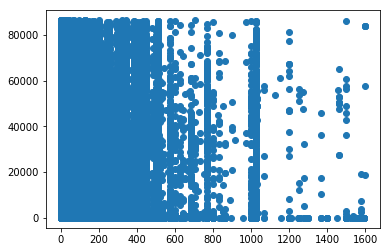

In [41]:
plt.scatter(X,Y)

In [42]:
cdf = df[df['job_status']=='COMPLETED']

In [50]:
cdf = cdf[cdf['trun_seconds'] != 0]

In [51]:
frac_wait = cdf['twait_seconds']/cdf['trun_seconds']

In [52]:
frac_wait.describe()

count    1.815720e+06
mean     1.405450e+02
std      1.320260e+03
min      0.000000e+00
25%      3.759398e-02
50%      2.217195e-01
75%      2.000000e+00
max      8.282400e+04
dtype: float64

In [53]:
efficiency = cdf['trun_seconds']/(cdf['trun_seconds']+cdf['twait_seconds'])

In [55]:
efficiency.describe()

count    1.815720e+06
mean     6.399850e-01
std      3.566199e-01
min      1.207365e-05
25%      3.333333e-01
50%      8.185185e-01
75%      9.637681e-01
max      1.000000e+00
dtype: float64

In [56]:
import numpy as np

Text(0,0.5,'twait/trun')

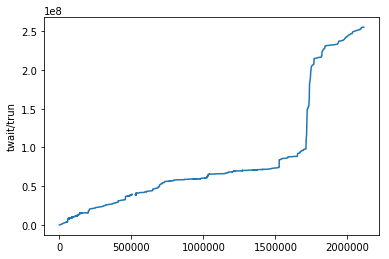

In [59]:
plt.plot(np.cumsum(frac_wait))
plt.ylabel("twait/trun")

Text(0,0.5,'R/R+W')

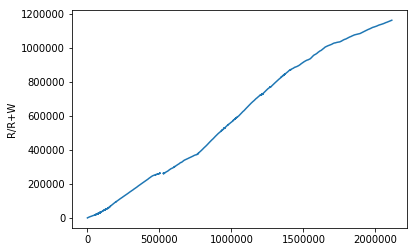

In [60]:
plt.plot(np.cumsum(efficiency))
plt.ylabel("R/R+W")